<a href="https://colab.research.google.com/github/eyradel/-Real-time-remote-prediction-of-cable-breaks-in-telecommunication-systems/blob/main/Copy_of_Tweeter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load datasets
dataset1 = pd.read_csv('Twitter comments.csv')
dataset2= pd.read_csv('Twitter Likes.csv')

print(dataset1.head())
print(dataset2.head())

   investor_name   organization       investor   commented_user  count
0  Ryan McIntyre  Foundry Group  ryan_mcintyre       hunterwalk     25
1  Ryan McIntyre  Foundry Group  ryan_mcintyre        yoavlurie     16
2  Ryan McIntyre  Foundry Group  ryan_mcintyre        pkedrosky     15
3  Ryan McIntyre  Foundry Group  ryan_mcintyre      chrismichel     14
4  Ryan McIntyre  Foundry Group  ryan_mcintyre  JasonHirschhorn     10
   investor_name   organization       investor     liked_user  count
0  Ryan McIntyre  Foundry Group  ryan_mcintyre    chrismichel    153
1  Ryan McIntyre  Foundry Group  ryan_mcintyre      yoavlurie    153
2  Ryan McIntyre  Foundry Group  ryan_mcintyre  Rainmaker1973     84
3  Ryan McIntyre  Foundry Group  ryan_mcintyre         KatieS     41
4  Ryan McIntyre  Foundry Group  ryan_mcintyre             km     33


In [ ]:
merged_data = pd.merge(dataset1, dataset2, on='investor', how='outer')
print(merged_data)

         investor_name_x organization_x       investor commented_user  \
0          Ryan McIntyre  Foundry Group  ryan_mcintyre     hunterwalk   
1          Ryan McIntyre  Foundry Group  ryan_mcintyre     hunterwalk   
2          Ryan McIntyre  Foundry Group  ryan_mcintyre     hunterwalk   
3          Ryan McIntyre  Foundry Group  ryan_mcintyre     hunterwalk   
4          Ryan McIntyre  Foundry Group  ryan_mcintyre     hunterwalk   
...                  ...            ...            ...            ...   
44103462             NaN            NaN   kevincomolli            NaN   
44103463             NaN            NaN   kevincomolli            NaN   
44103464             NaN            NaN   kevincomolli            NaN   
44103465             NaN            NaN   kevincomolli            NaN   
44103466             NaN            NaN   johnbuttrick            NaN   

          count_x investor_name_y         organization_y     liked_user  \
0            25.0   Ryan McIntyre          Found

In [ ]:
# Unique investors
unique_investors = merged_data['investor'].nunique()
print(f"Number of unique investors: {unique_investors}")

# Unique commented or liked users
unique_users = merged_data['commented_user'].append(merged_data['liked_user']).nunique()
print(f"Number of unique commented or liked users: {unique_users}")

# Top 10 most liked users
top_liked = merged_data['liked_user'].value_counts().head(10)
print("Top 10 most liked users:")
print(top_liked)

# Top 10 most commented users
top_commented = merged_data['commented_user'].value_counts().head(10)
print("\nTop 10 most commented users:")
print(top_commented)


Number of unique investors: 326


<ipython-input-12-fb8e689af1d2>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_users = merged_data['commented_user'].append(merged_data['liked_user']).nunique()


Number of unique commented or liked users: 91823
Top 10 most liked users:
paulg             40089
garrytan          38128
levie             37355
HarryStebbings    36621
elonmusk          36544
semil             34637
sama              33678
danprimack        33523
davidu            33076
saranormous       31813
Name: liked_user, dtype: int64

Top 10 most commented users:
semil             67299
hunterwalk        64448
HarryStebbings    62127
danprimack        49606
davidu            48134
paulg             46365
benedictevans     45499
joshelman         43663
garrytan          43307
alexrkonrad       42399
Name: commented_user, dtype: int64


In [ ]:
merged_data.columns

Index(['investor_name_x', 'organization_x', 'investor', 'commented_user',
       'count_x', 'investor_name_y', 'organization_y', 'liked_user',
       'count_y'],
      dtype='object')

In [ ]:
# Top 5 organizations receiving most likes/comments by other investors
investors_set = set(merged_data['investor'])
filter_condition = (merged_data['liked_user'].isin(investors_set)) | (merged_data['commented_user'].isin(investors_set))
org_likes_comments = merged_data[filter_condition]['organization_x'].value_counts().head(5)
print("\nTop 5 organizations receiving most likes/comments by other investors:")
print(org_likes_comments)

# Top 10 accounts investors in Sequoia Capital like/comment
sequoia_data = merged_data[merged_data['organization_y'] == 'Sequoia Capital']
sequoia_likes_comments = sequoia_data['liked_user'].append(sequoia_data['commented_user']).value_counts().head(10)
print("\nTop 10 accounts investors in Sequoia Capital like/comment:")
print(sequoia_likes_comments)



Top 5 organizations receiving most likes/comments by other investors:
Andreessen Horowitz            649675
Lightspeed Venture Partners    416916
Greylock                       208302
First Round Capital            166137
Y Combinator                   154317
Name: organization_x, dtype: int64


<ipython-input-14-2cd0378f5991>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sequoia_likes_comments = sequoia_data['liked_user'].append(sequoia_data['commented_user']).value_counts().head(10)



Top 10 accounts investors in Sequoia Capital like/comment:
andrew__reed       8287
HarryStebbings     7025
saranormous        6944
sequoia            6184
alexrkonrad        6080
GuptaRK22          5990
karrisaarinen      5876
sonyatweetybird    5704
nataliemiyake      5575
shaunmmaguire      5432
dtype: int64


In [ ]:
user_interactions = merged_data.groupby(['investor', 'liked_user']).size().reset_index(name='count')
merged_interactions = pd.merge(user_interactions, user_interactions, left_on=['investor', 'liked_user'], right_on=['liked_user', 'investor'])
criteria_met = merged_interactions[(merged_interactions['count_x'] > 3) & (merged_interactions['count_y'] > 3)]
print("\n2-user-tuple meeting the criteria:")
print(criteria_met[['investor_x', 'liked_user_x', 'count_x', 'count_y']])



2-user-tuple meeting the criteria:
      investor_x   liked_user_x  count_x  count_y
0     AjayChopra     AjayChopra       59       59
1     AjayChopra       pnakache       59       56
2     Alfred_Lin       ataussig       87      369
3     Alfred_Lin        jesskah       87      171
4     Alfred_Lin  shaunmmaguire       87      743
...          ...            ...      ...      ...
2326    znoorani      fifaifofo      247      174
2327    znoorani    joannezchen      247       79
2328    znoorani        sidtriv      247       90
2329    znoorani       vassallo      247      244
2330    znoorani       znoorani      247      247

[2229 rows x 4 columns]


In [ ]:
merged_data.columns

Index(['investor_name_x', 'organization_x', 'investor', 'commented_user',
       'count_x', 'investor_name_y', 'organization_y', 'liked_user',
       'count_y'],
      dtype='object')

In [ ]:

top_commented_users = merged_data.groupby('commented_user').size().nlargest(10)
print("top_commented_users",top_commented_users)

top_commented_users commented_user
semil             67299
hunterwalk        64448
HarryStebbings    62127
danprimack        49606
davidu            48134
paulg             46365
benedictevans     45499
joshelman         43663
garrytan          43307
alexrkonrad       42399
dtype: int64


In [ ]:
#VISUALIZATIONS

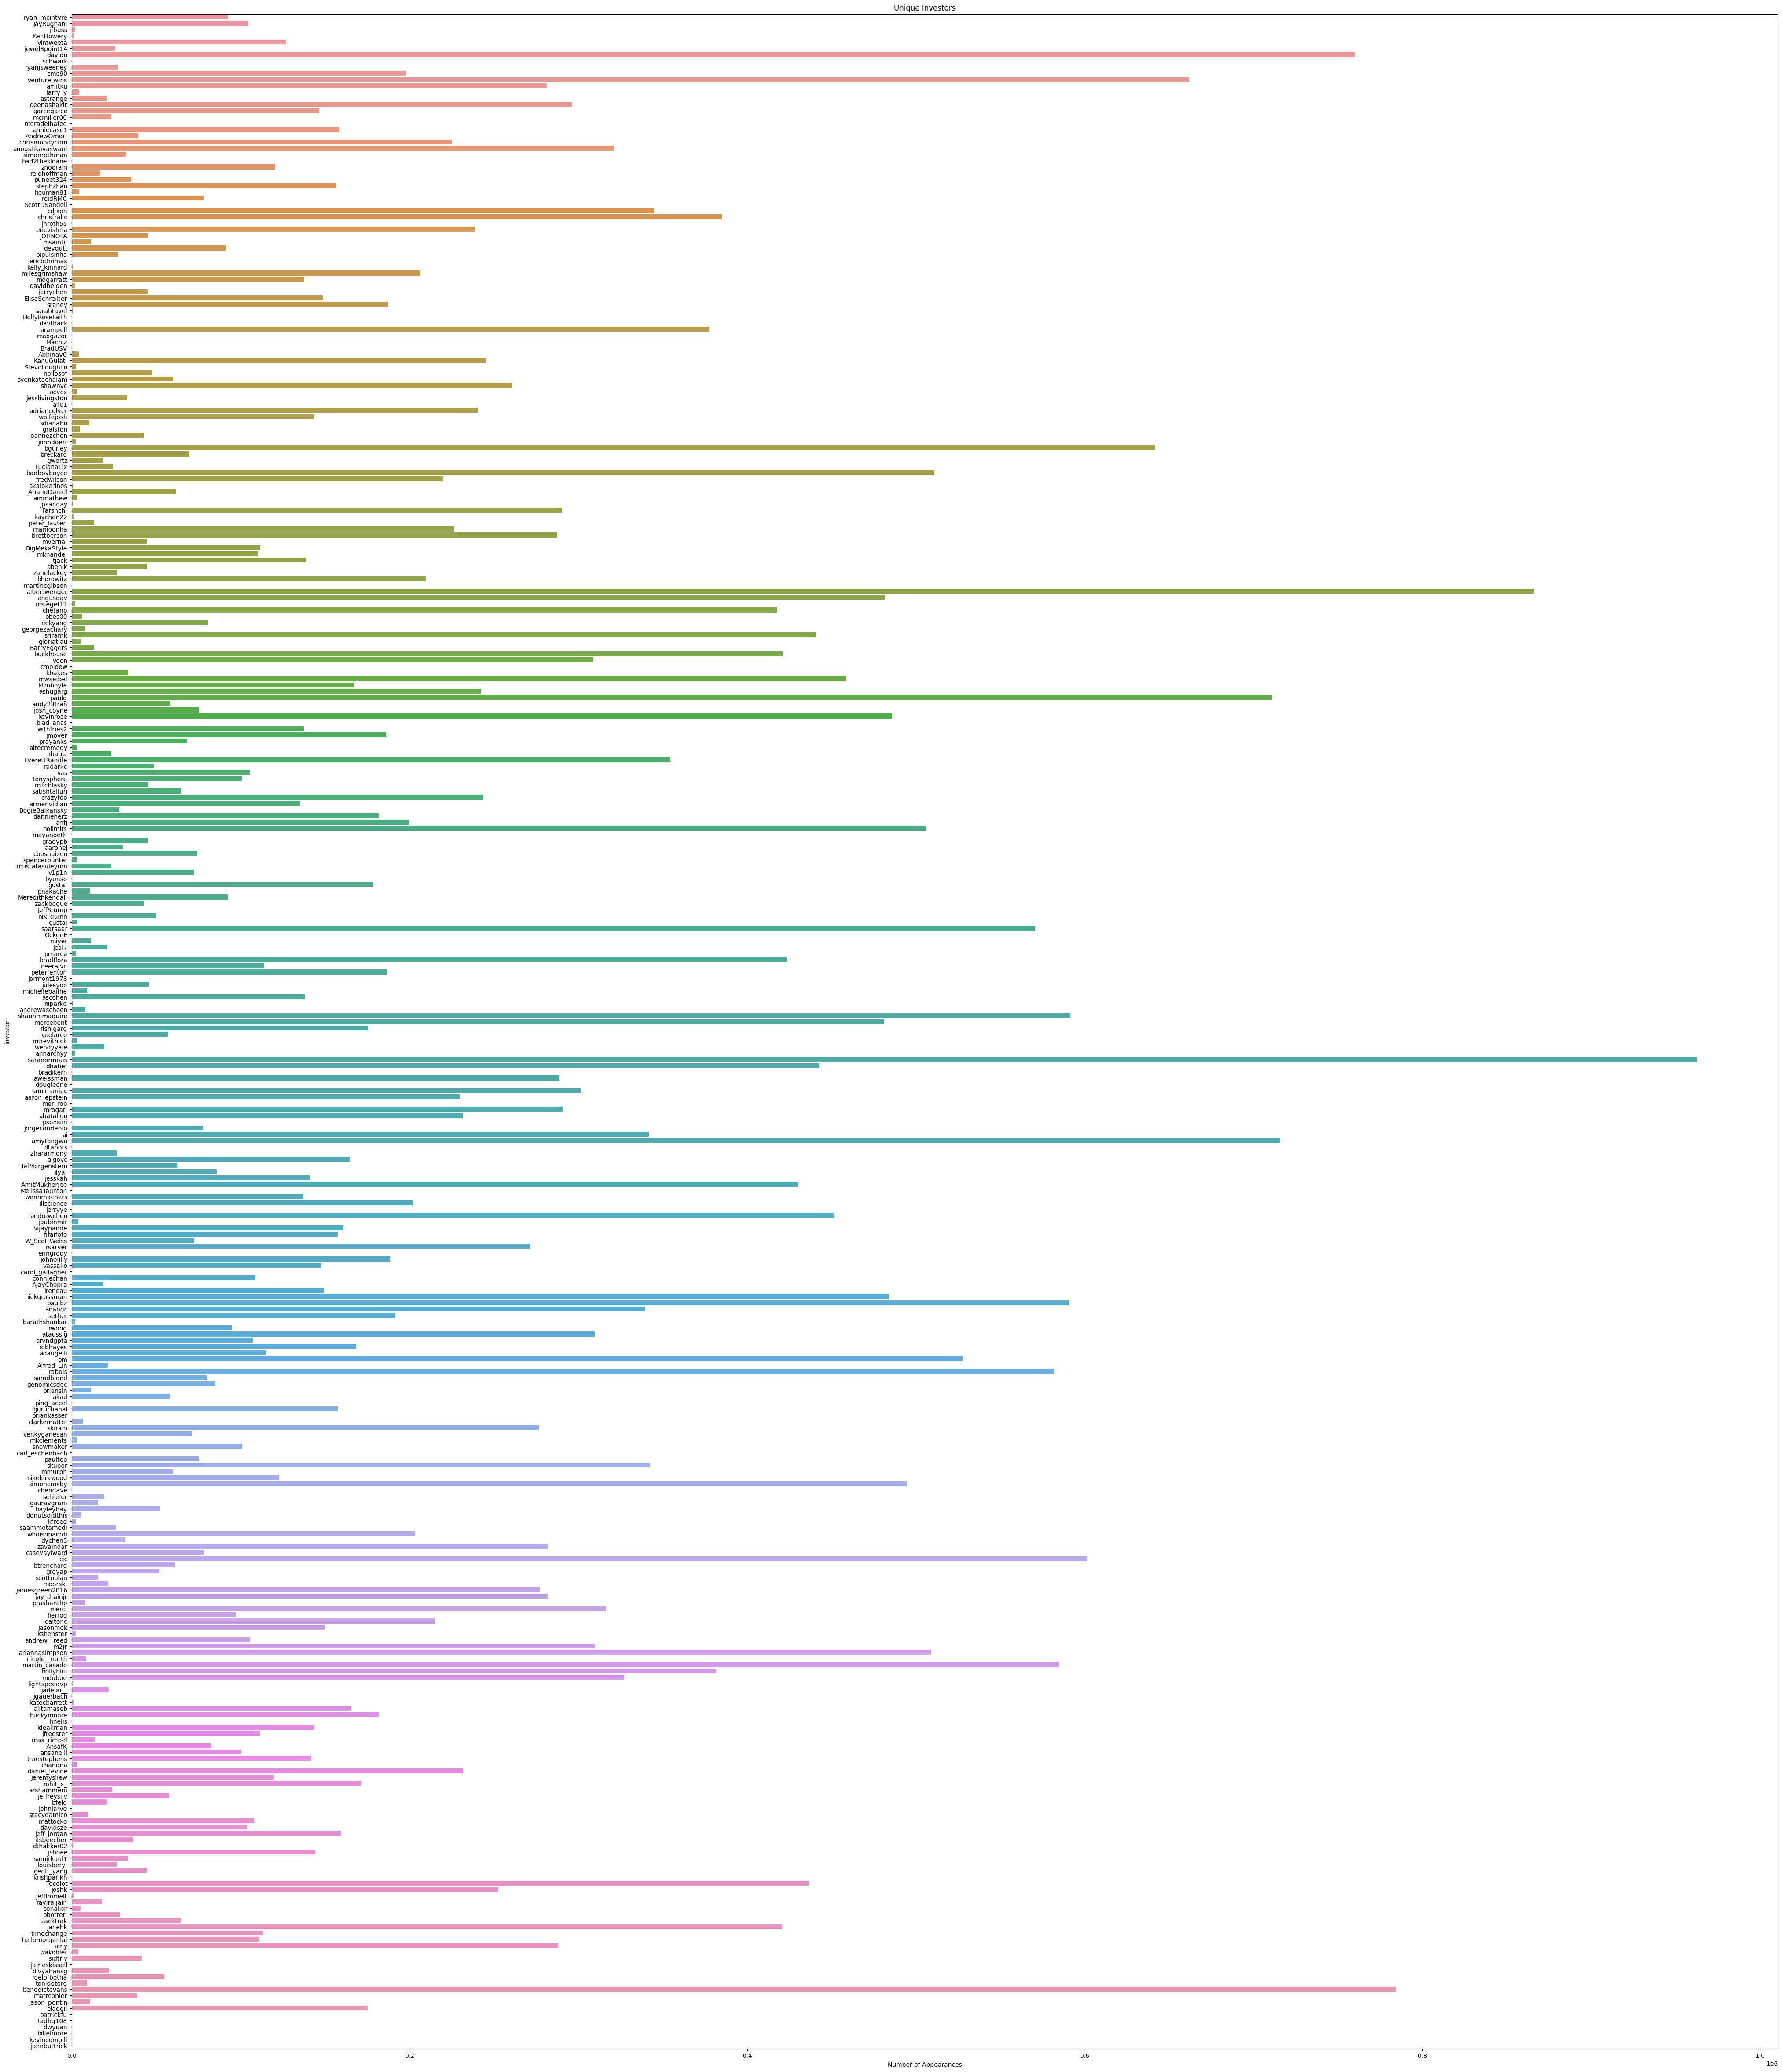

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50, 60))
sns.countplot(y=merged_data['investor'])
plt.title("Unique Investors")
plt.xlabel("Number of Appearances")
plt.show()


<ipython-input-23-b63a1e1815cc>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sns.countplot(y=merged_data['commented_user'].append(merged_data['liked_user']))


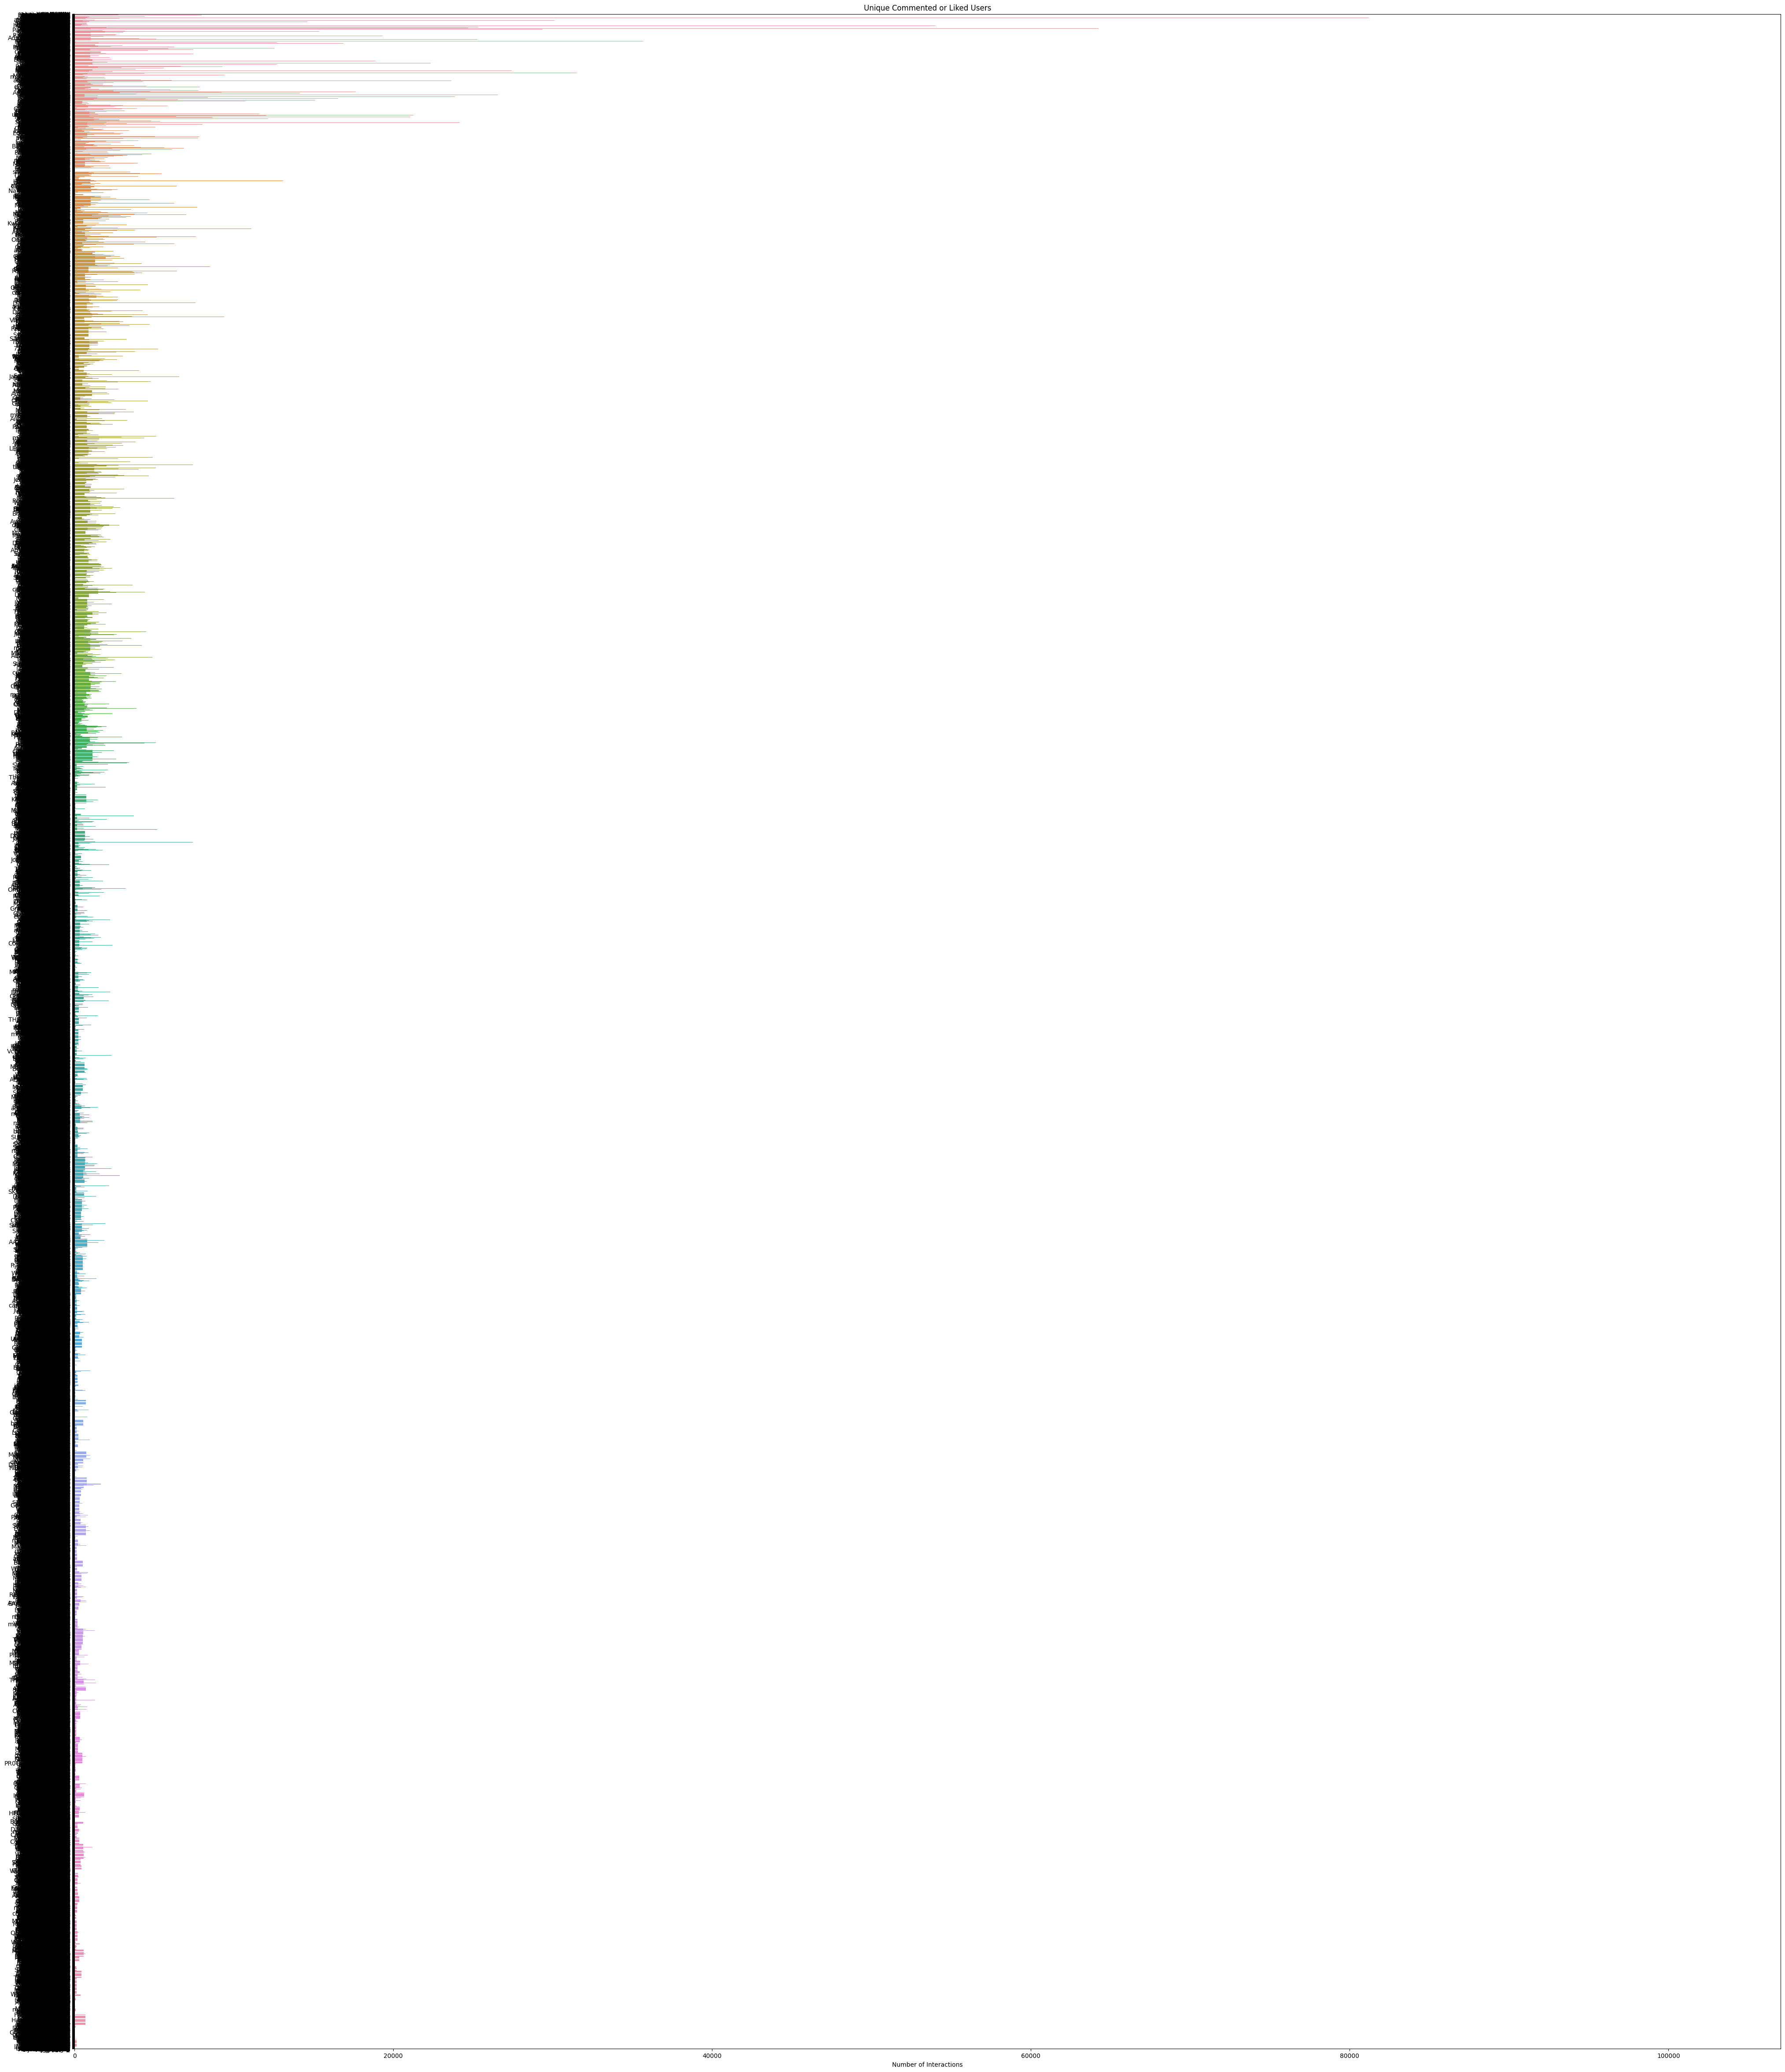

In [ ]:
plt.figure(figsize=(50, 60))
sns.countplot(y=merged_data['commented_user'].append(merged_data['liked_user']))
plt.title("Unique Commented or Liked Users")
plt.xlabel("Number of Interactions")
plt.show()


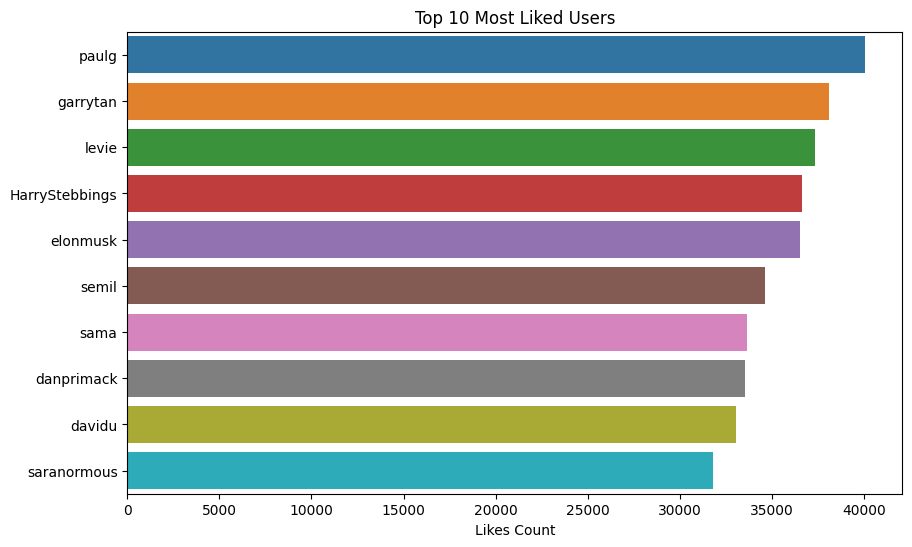

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_liked.index, x=top_liked.values)
plt.title("Top 10 Most Liked Users")
plt.xlabel("Likes Count")
plt.show()


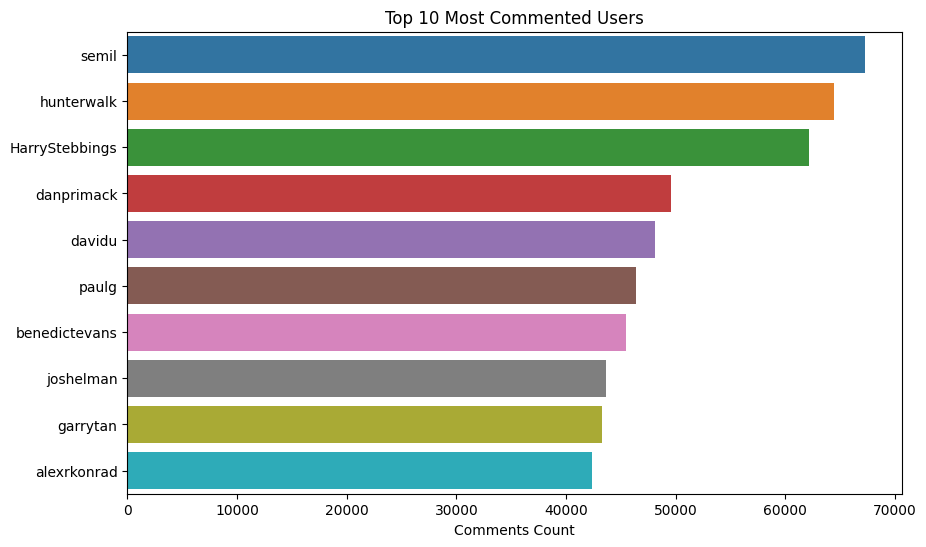

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_commented.index, x=top_commented.values)
plt.title("Top 10 Most Commented Users")
plt.xlabel("Comments Count")
plt.show()


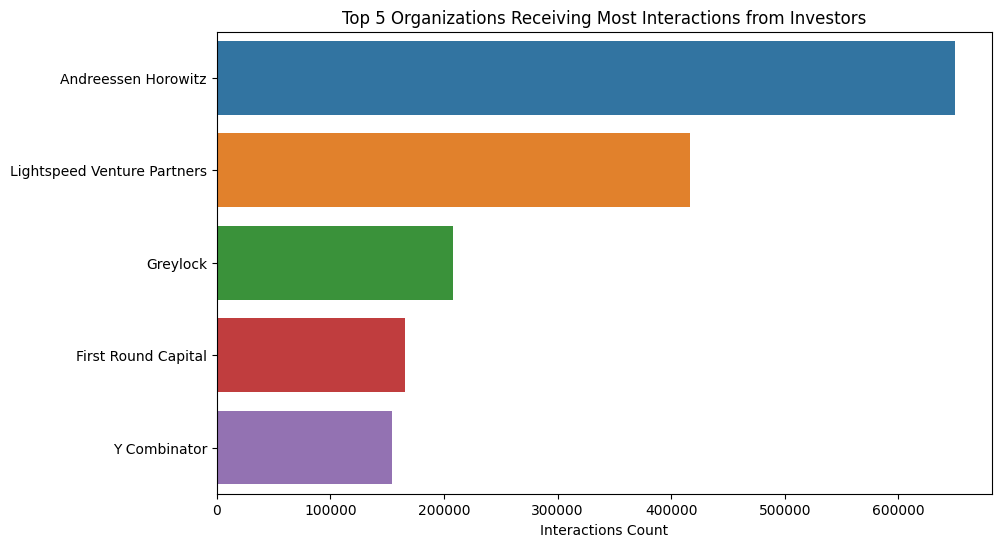

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=org_likes_comments.index, x=org_likes_comments.values)
plt.title("Top 5 Organizations Receiving Most Interactions from Investors")
plt.xlabel("Interactions Count")
plt.show()


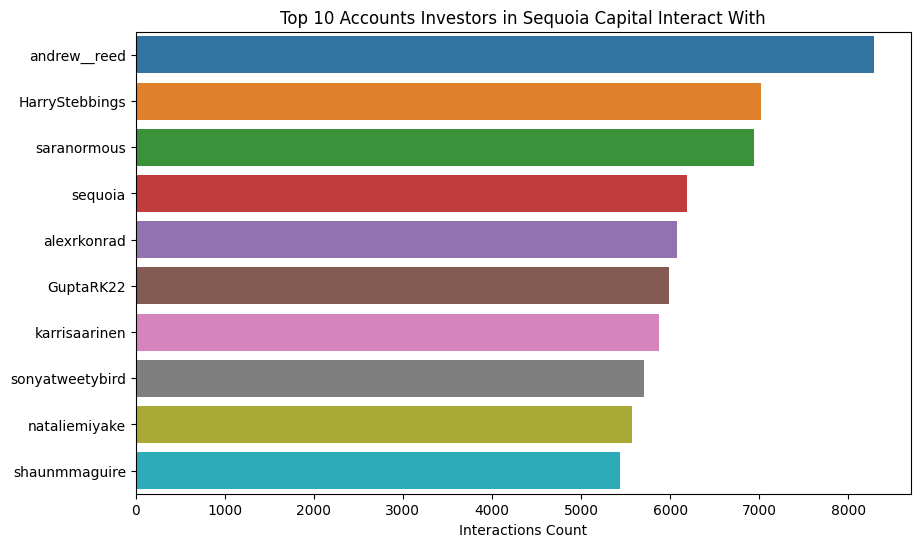

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=sequoia_likes_comments.index, x=sequoia_likes_comments.values)
plt.title("Top 10 Accounts Investors in Sequoia Capital Interact With")
plt.xlabel("Interactions Count")
plt.show()


<ipython-input-28-ba3a21ecda21>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


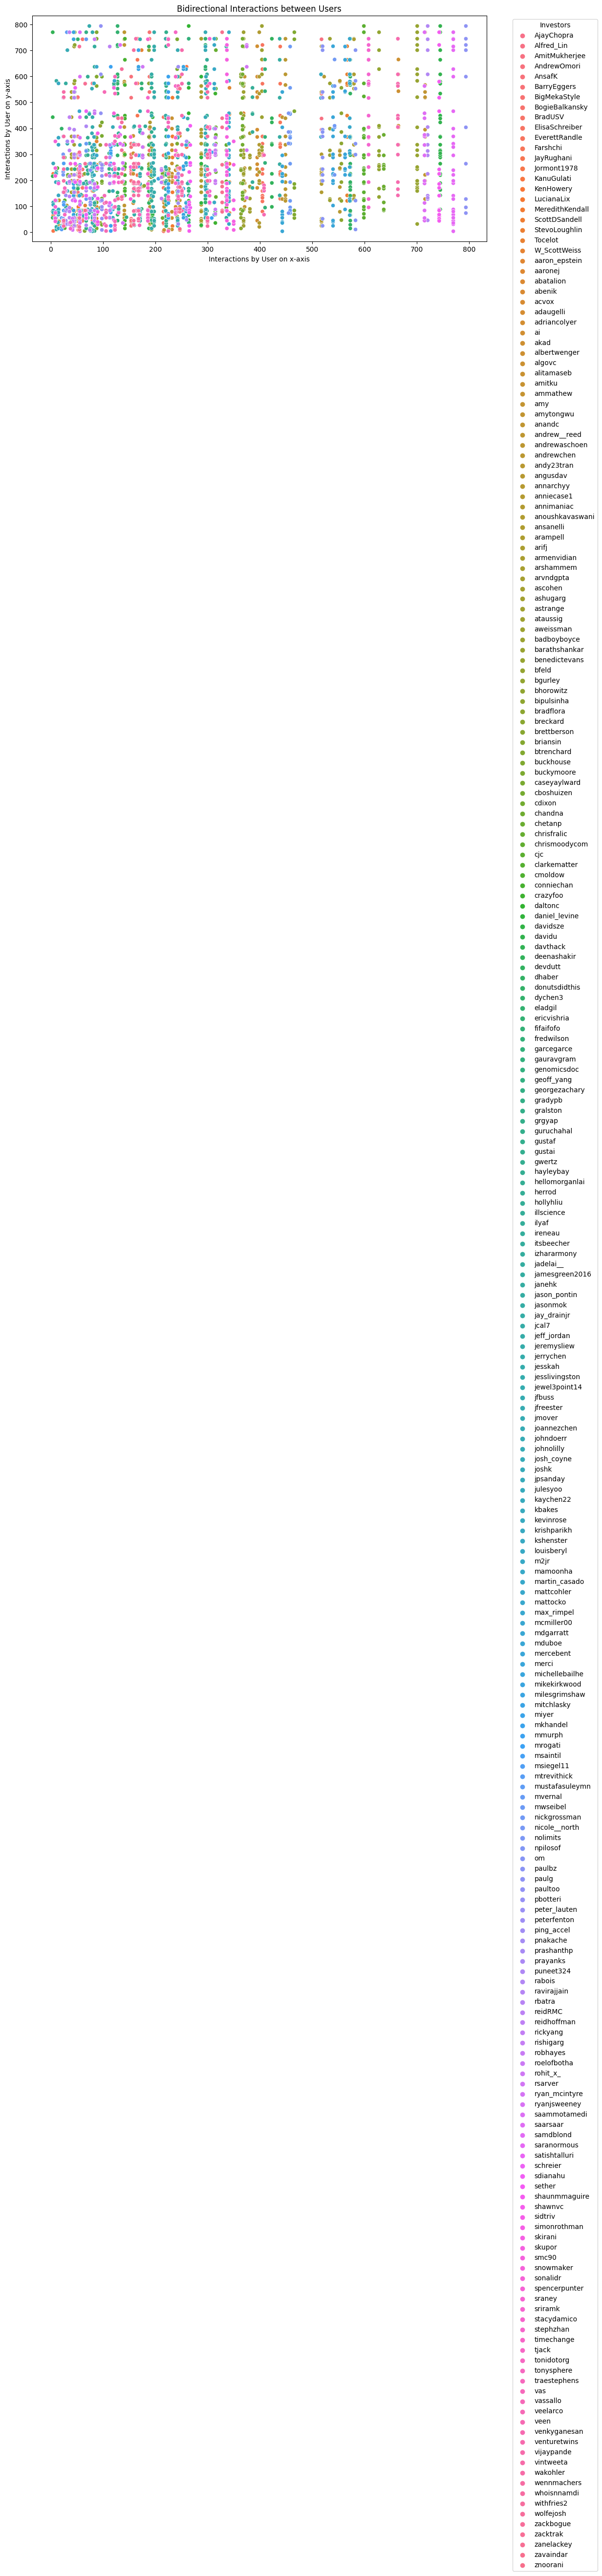

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=criteria_met['count_x'], y=criteria_met['count_y'], hue=criteria_met['investor_x'])
plt.title("Bidirectional Interactions between Users")
plt.xlabel("Interactions by User on x-axis")
plt.ylabel("Interactions by User on y-axis")
plt.legend(title="Investors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
